In [51]:
import pandas as pd
import numpy as np
#import tensorflow as tf
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('../DATA/dataset_stick_figure9.csv')

In [53]:
df.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,y29,x30,y30,x31,y31,x32,y32,x33,y33,y
0,512,94,510,90,508,91,505,91,516,91,...,342,492,346,522,345,489,342,534,361,n
1,511,94,508,90,506,91,504,91,514,91,...,358,494,370,521,369,491,361,526,362,n
2,510,95,506,91,504,91,502,91,513,91,...,360,495,371,522,371,491,362,523,362,n
3,509,95,506,91,504,91,502,91,512,91,...,360,496,372,522,371,490,361,522,362,n
4,509,95,505,91,503,91,501,91,511,91,...,361,496,372,522,372,490,363,522,362,n


In [54]:
df.isnull().sum()

x1     0
y1     0
x2     0
y2     0
x3     0
      ..
x32    0
y32    0
x33    0
y33    0
y      0
Length: 67, dtype: int64

In [55]:
#df = df.sample(frac = 1)

In [56]:
df['pose'] = df['y'].map({"c":0,"r":1,"n":2,"q":3})

In [57]:
df['pose']

0        2
1        2
2        2
3        2
4        2
        ..
71518    1
71519    1
71520    1
71521    1
71522    1
Name: pose, Length: 71523, dtype: int64

In [58]:
df.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,x30,y30,x31,y31,x32,y32,x33,y33,y,pose
0,512,94,510,90,508,91,505,91,516,91,...,492,346,522,345,489,342,534,361,n,2
1,511,94,508,90,506,91,504,91,514,91,...,494,370,521,369,491,361,526,362,n,2
2,510,95,506,91,504,91,502,91,513,91,...,495,371,522,371,491,362,523,362,n,2
3,509,95,506,91,504,91,502,91,512,91,...,496,372,522,371,490,361,522,362,n,2
4,509,95,505,91,503,91,501,91,511,91,...,496,372,522,372,490,363,522,362,n,2


In [59]:
df = df.drop(['y'],axis=1)

In [60]:
#df = df.astype(int)

In [61]:
df.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,y29,x30,y30,x31,y31,x32,y32,x33,y33,pose
0,512,94,510,90,508,91,505,91,516,91,...,342,492,346,522,345,489,342,534,361,2
1,511,94,508,90,506,91,504,91,514,91,...,358,494,370,521,369,491,361,526,362,2
2,510,95,506,91,504,91,502,91,513,91,...,360,495,371,522,371,491,362,523,362,2
3,509,95,506,91,504,91,502,91,512,91,...,360,496,372,522,371,490,361,522,362,2
4,509,95,505,91,503,91,501,91,511,91,...,361,496,372,522,372,490,363,522,362,2


In [62]:
#df.head(600)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = df.drop('pose',axis=1).values
y = df['pose'].values

In [65]:
print(len(df))

71523


In [66]:
#y = df['pose'].map({0:np.array([0.,0,0,0]),1:np.array([0.,1,0,0]),2:np.array([0.,0,1,0]),3:np.array([0.,0,0,1])})

In [67]:
from tensorflow.keras.utils import to_categorical

In [68]:
#y = to_categorical(y,4)

In [69]:
#y[8000]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [71]:
y_cat_train = to_categorical(y_train,4)

In [72]:
y_cat_test = to_categorical(y_test,4)

In [73]:
#y_cat_train.shape

In [74]:
#y_cat_train[0]

In [75]:
#y_cat_train = df['pose'].map({0:np.array([0.,0,0,0]),1:np.array([0.,1,0,0]),2:np.array([0.,0,1,0]),3:np.array([0.,0,0,1])})

In [76]:
#y_cat_train = df['pose'].map({0:np.array([[0],[0],[0],[0]]),1:np.array([[0],[1],[0],[0]]),2:np.array([[0],[0],[1],[0]]),3:np.array([[0],[0],[0],[1]])})

In [77]:
#y_cat_train.shape

In [78]:
#y_cat_train[100].shape

In [79]:
#y_cat_test = y_test.map({0:[0,0,0,0],1:[0,1,0,0],2:[0,0,1,0],3:[0,0,0,1]})

In [80]:
#y_cat_test[700]

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler = MinMaxScaler()

In [83]:
X_train = scaler.fit_transform(X_train)

In [84]:
X_test = scaler.transform(X_test)

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.optimizers import Adam

In [86]:
X_train.shape

(50066, 66)

In [87]:
model = Sequential()

#model.add(Dense(units=99,activation='relu'))
model.add(Dense(units=66,activation='relu'))
#model.add(Dense(units=44,activation='relu'))
model.add(Dense(units=33,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=4,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [88]:
from tensorflow.keras.callbacks import EarlyStopping

In [89]:
early_stop = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=1)

In [90]:
model.fit(x=X_train, 
          y=y_cat_train, 
          epochs=160,
          batch_size= 50066,
          validation_data=(X_test, y_cat_test), verbose=1,
          #callbacks= [early_stop]
          )

Train on 50066 samples, validate on 21457 samples
Epoch 1/160
50066/50066 [==============================] - 1s 10us/sample - loss: 1.3735 - acc: 0.3633 - val_loss: 1.3496 - val_acc: 0.3885
Epoch 2/160
50066/50066 [==============================] - 0s 3us/sample - loss: 1.3487 - acc: 0.3916 - val_loss: 1.3311 - val_acc: 0.3975
Epoch 3/160
50066/50066 [==============================] - 0s 3us/sample - loss: 1.3303 - acc: 0.4004 - val_loss: 1.3169 - val_acc: 0.4124
Epoch 4/160
50066/50066 [==============================] - 0s 3us/sample - loss: 1.3163 - acc: 0.4149 - val_loss: 1.3039 - val_acc: 0.4280
Epoch 5/160
50066/50066 [==============================] - 0s 4us/sample - loss: 1.3035 - acc: 0.4310 - val_loss: 1.2909 - val_acc: 0.4460
Epoch 6/160
50066/50066 [==============================] - 0s 4us/sample - loss: 1.2907 - acc: 0.4502 - val_loss: 1.2777 - val_acc: 0.4621
Epoch 7/160
50066/50066 [==============================] - 0s 3us/sample - loss: 1.2778 - acc: 0.4672 - val_loss: 1

In [91]:
losses = pd.DataFrame(model.history.history)

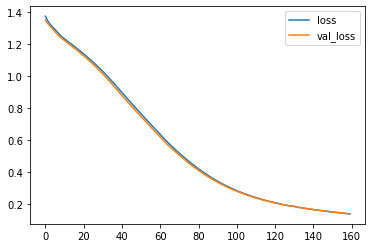

In [92]:
# loss --> Training loss, val_loss--> Test data loss
losses[['loss','val_loss']].plot()

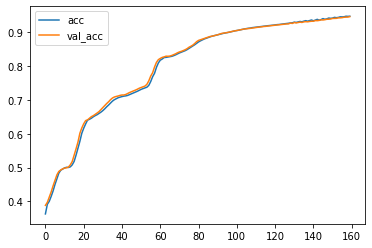

In [93]:
# acc --> accuracy of training data, val_acc --> accuracy of test data
losses[['acc','val_acc']].plot()

In [94]:
from sklearn.metrics import classification_report,confusion_matrix

In [95]:
predictions = model.predict_classes(X_test)

In [96]:
predictions

array([0, 2, 2, ..., 3, 1, 3], dtype=int64)

In [97]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      3634
           1       1.00      0.99      0.99      3047
           2       0.94      0.90      0.92      6999
           3       0.90      0.95      0.93      7777

    accuracy                           0.95     21457
   macro avg       0.96      0.95      0.96     21457
weighted avg       0.95      0.95      0.95     21457



In [98]:
confusion_matrix(y_test,predictions)

array([[3543,    0,    0,   91],
       [   1, 3017,   11,   18],
       [   0,    0, 6314,  685],
       [   0,    1,  370, 7406]], dtype=int64)

In [167]:
import random
#random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('pose',axis=1).iloc[random_ind]
#print(new_customer)
print(random_ind)
print(df['pose'][random_ind])

21654
3


In [168]:
result = model.predict_classes(new_customer.values.reshape(1,66))

In [169]:
new_customer.shape

(66,)

In [170]:
result

array([3], dtype=int64)

In [171]:
from tensorflow.keras.models import load_model

In [172]:
model.save('pose_model11.h5')

In [661]:
import seaborn as sns

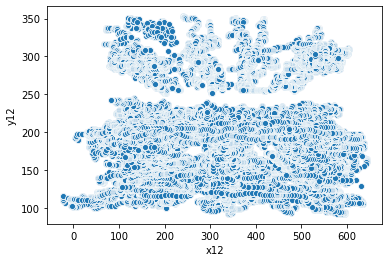

In [662]:
sns.scatterplot(x='x12',y='y12',data=df)

D:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


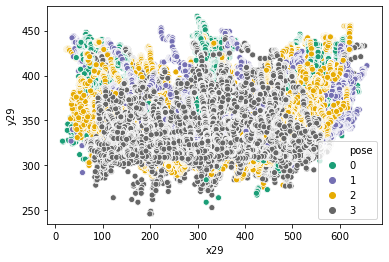

In [663]:
sns.scatterplot(x='x29',y='y29',data=df,hue='pose',palette='Dark2')

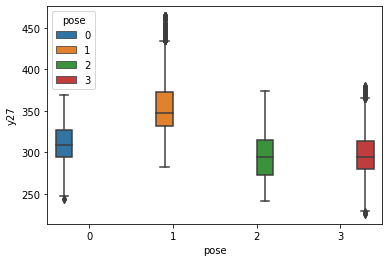

In [671]:
sns.boxplot(x='pose',y='y27',data=df,hue='pose')